In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def load_predictions(model, split):
    pred_path = f"../results/{model}/{split}/test_predict.csv"
    raw_path = f"../data/{split}/raw/raw_test.csv"

    df_pred = pd.read_csv(pred_path)
    df_raw = pd.read_csv(raw_path)

    y_true = df_raw["permeability"]
    y_pred = df_pred["predict_permeability"]
    return y_true, y_pred, df_raw

def plot_prediction(ax, y_true, y_pred, title_suffix=""):
    sns.scatterplot(x=y_true, y=y_pred, ax=ax, s=20, alpha=0.7)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=1)
    mse = mean_squared_error(y_true, y_pred)
    ax.set_title(f"{title_suffix}\nMSE = {mse:.2f}")

def plot_grouped_by_monomer(ax, y_true, y_pred, num_monomers, title_suffix=""):
    unique_monomers = num_monomers.unique()
    for monomer in unique_monomers:
        mask = num_monomers == monomer
        sns.scatterplot(x=y_true[mask], y=y_pred[mask], ax=ax, label=f"{monomer}", s=20, alpha=0.7)
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=1)
    # mse = mean_squared_error(y_true, y_pred)
    # ax.set_title(f"{title_suffix}\nMSE = {mse:.2f}")
    ax.set_xlim(-10, -4)
    ax.set_ylim(-10, -4)
    ax.legend(title="# of monomers", loc="lower left", title_fontsize=7, fontsize=7)

# Data

In [5]:
df = pd.read_csv("../data/permeability.csv")
plt.hist(df['permeability'],bins = 30)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../data/permeability.csv'

# Results

In [4]:
# add new here
model_list = ["baseline","MLP_morganfp","Graph_2d", "Graph_3d_schnet", ]
split_list = ["split_random","split_monomer","strat_split_monomer"]

In [5]:
# --- Metric Summary Table ---
results = []
for model in model_list:
    for split in split_list:
        y_true, y_pred, _ = load_predictions(model, split)
        results.append({
            "Model": model,
            "Split": split,
            "MSE": mean_squared_error(y_true, y_pred),
            "R2 Score": r2_score(y_true, y_pred)
        })

results_df = pd.DataFrame(results)
results_df

,Model,Split,MSE,R2 Score
0,baseline,split_random,0.477743,-0.197663
1,baseline,split_monomer,0.671564,-1.727586
2,baseline,strat_split_monomer,0.392984,-0.159961
3,MLP_morganfp,split_random,0.200214,0.498080
4,MLP_morganfp,split_monomer,0.340986,-0.384930
5,MLP_morganfp,strat_split_monomer,0.186514,0.449471
6,Graph_2d,split_random,0.263479,0.339480
7,Graph_2d,split_monomer,0.209637,0.148551
8,Graph_2d,strat_split_monomer,0.246487,0.272451
9,Graph_3d_schnet,split_random,0.212231,0.467953


# MSE by number of monomer

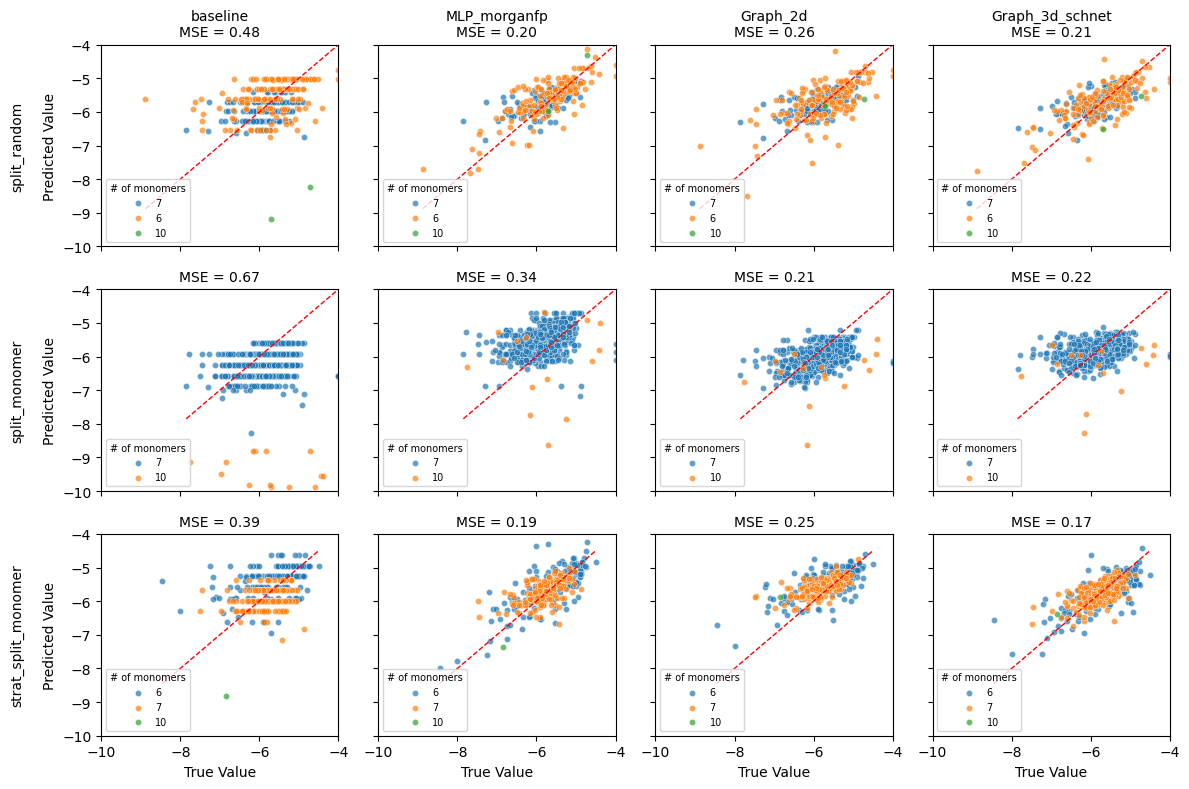

In [6]:
fig, axes = plt.subplots(len(split_list), len(model_list), figsize=(12, 8), sharex=True, sharey=True)

for i, split in enumerate(split_list):
    for j, model in enumerate(model_list):
        ax = axes[i, j]
        y_true, y_pred, df_raw = load_predictions(model, split)
        plot_grouped_by_monomer(ax, y_true, y_pred, df_raw["num_monomers"], f"{model}, {split}")

        # Compute MSE
        mse = mean_squared_error(y_true, y_pred)
        if i == 0:
            ax.set_title(f"{model}\nMSE = {mse:.2f}", fontsize=10)
        else:
            ax.set_title(f"MSE = {mse:.2f}", fontsize=10)

        # Row label (left column)
        if j == 0:
            ax.set_ylabel(f"{split}\n\nPredicted Value", fontsize=10)
        else:
            ax.set_ylabel("")

        # X-axis label only on bottom row
        if i == len(split_list) - 1:
            ax.set_xlabel("True Value", fontsize=10)
        else:
            ax.set_xlabel("")

plt.tight_layout()
plt.show()

# MSE by level of permeability


In [ ]:
results = []
for model in model_list:
    for split in split_list:
        y_true, y_pred, _ = load_predictions(model, split)

        # Convert to NumPy arrays if needed
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)

        # Define masks
        high_mask = y_true >= -6
        low_mask = y_true < -6

        # Compute MSE for each level
        mse_total = mean_squared_error(y_true, y_pred)
        mse_high = mean_squared_error(y_true[high_mask], y_pred[high_mask]) if np.any(high_mask) else np.nan
        mse_low = mean_squared_error(y_true[low_mask], y_pred[low_mask]) if np.any(low_mask) else np.nan

        results.append({
            "Model": model,
            "Split": split,
            "MSE_total": mse_total,
            "MSE_high": mse_high,
            "MSE_low": mse_low
        })

results_df = pd.DataFrame(results)
results_df

,Model,Split,MSE_total,MSE_high,MSE_low
0,baseline,split_random,0.477743,0.378586,0.700320
1,baseline,split_monomer,0.671564,0.800545,0.399105
2,baseline,strat_split_monomer,0.392984,0.231371,0.779058
3,MLP_morganfp,split_random,0.200214,0.113493,0.394874
4,MLP_morganfp,split_monomer,0.340986,0.211597,0.614309
5,MLP_morganfp,strat_split_monomer,0.186514,0.133571,0.312989
6,Graph_2d,split_random,0.263479,0.156488,0.503639
7,Graph_2d,split_monomer,0.209637,0.196969,0.236397
8,Graph_2d,strat_split_monomer,0.246487,0.108797,0.575412
9,Graph_3d_schnet,split_random,0.212231,0.135434,0.384617


/tmp/ipykernel_3106438/3692709096.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['High', 'Low'], y=values, ax=ax, palette='pastel')
/tmp/ipykernel_3106438/3692709096.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['High', 'Low'], y=values, ax=ax, palette='pastel')
/tmp/ipykernel_3106438/3692709096.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['High', 'Low'], y=values, ax=ax, palette='pastel')
/tmp/ipykernel_3106438/3692709096.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

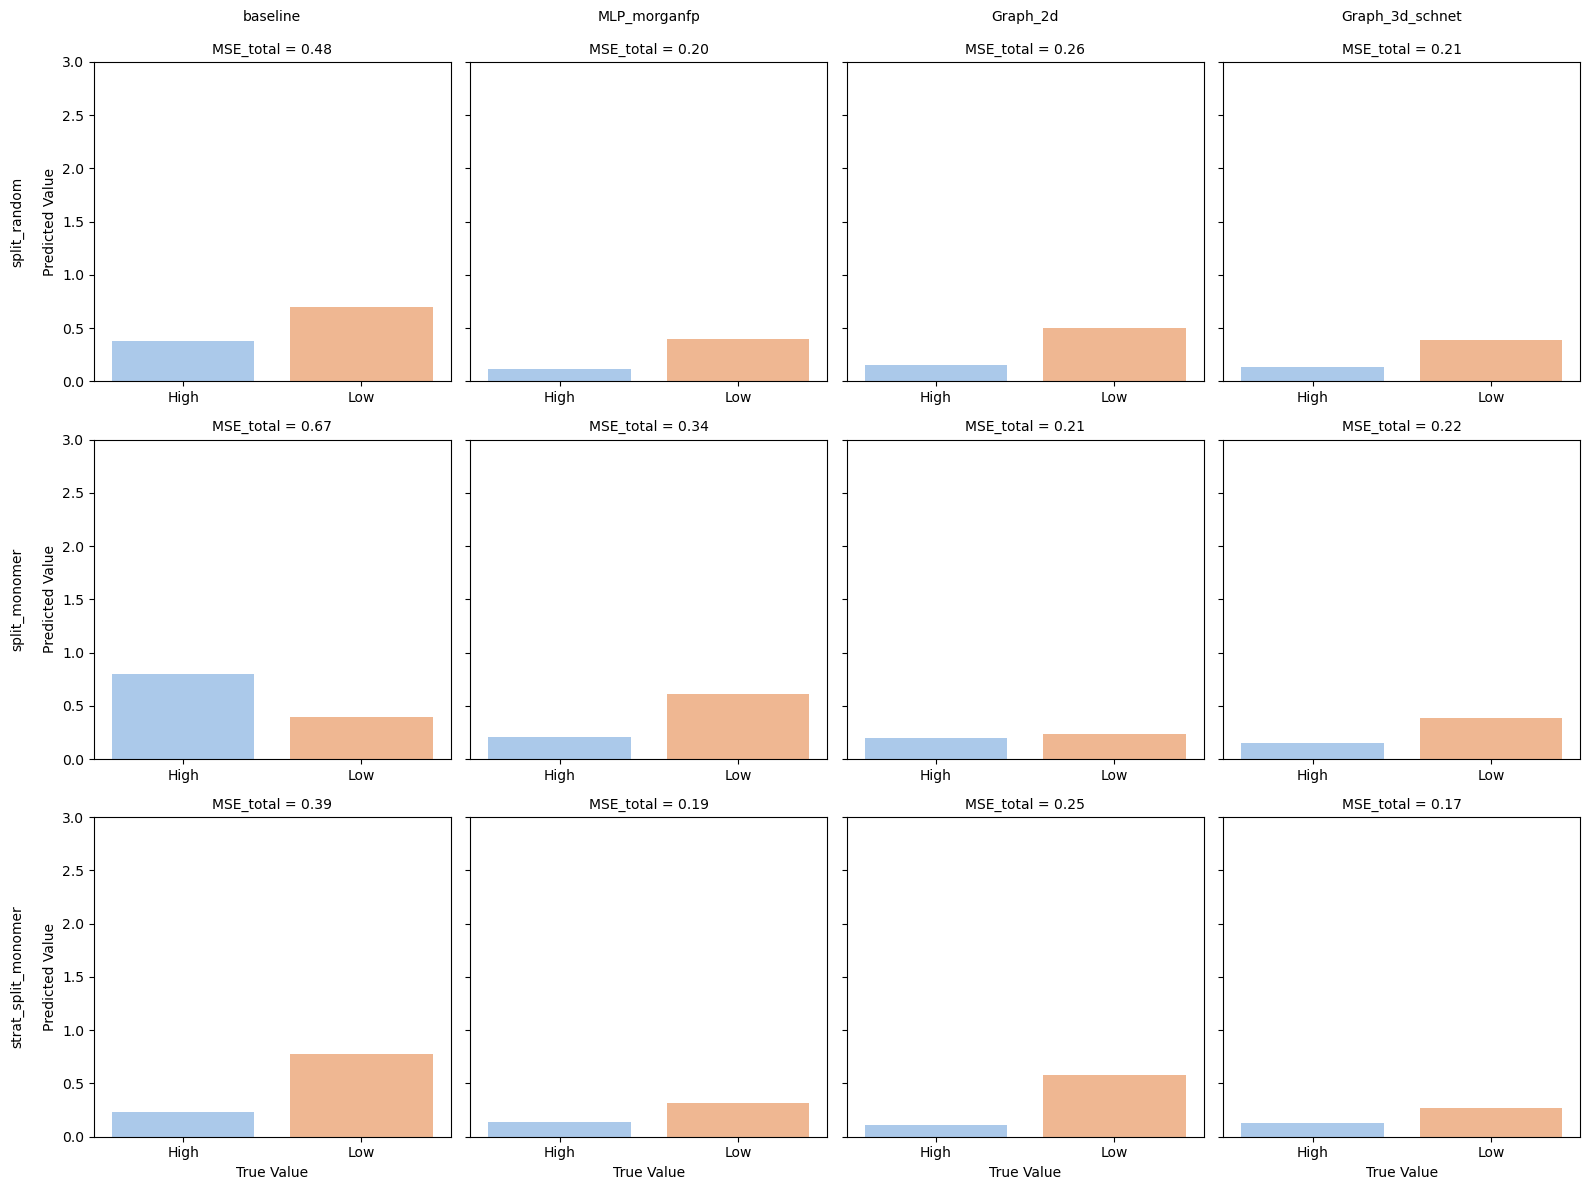

In [10]:
# Create a consistent order
splits = results_df['Split'].unique()
models = results_df['Model'].unique()
permeability_levels = ['MSE_high','MSE_low']

# Set up the figure
fig, axes = plt.subplots(len(splits), len(models), figsize=(4 * len(models), 4 * len(splits)), sharey=True)

# Plot each subplot
for i, split in enumerate(splits):
    for j, model in enumerate(models):
        ax = axes[i, j] if len(splits) > 1 else axes[j]  # handle 1-row case
        row = results_df[(results_df['Split'] == split) & (results_df['Model'] == model)]
        if row.empty:
            continue
        values = [row.iloc[0][lvl] for lvl in permeability_levels]
        mse = row.iloc[0]["MSE_total"]
        
        sns.barplot(x=['High', 'Low'], y=values, ax=ax, palette='pastel')
        ax.set_xlabel('')
        ax.set_ylabel('MSE' if j == 0 else '')
        ax.set_ylim(0,3)

        # Compute MSE
        if i == 0:
            ax.set_title(f"{model}\n\nMSE_total = {mse:.2f}", fontsize=10)
        else:
            ax.set_title(f"MSE_total = {mse:.2f}", fontsize=10)

        # Row label (left column)
        if j == 0:
            ax.set_ylabel(f"{split}\n\nPredicted Value", fontsize=10)
        else:
            ax.set_ylabel("")

        # X-axis label only on bottom row
        if i == len(split_list) - 1:
            ax.set_xlabel("True Value", fontsize=10)
        else:
            ax.set_xlabel("")

# Tidy up
plt.tight_layout()
plt.show()